In [1]:
import sys
import spotipy
import json
import webbrowser
import spotipy.util as util
from json.decoder import JSONDecodeError
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
from matplotlib import interactive
%matplotlib inline

In [2]:
# Get user name


# Username: yts1nrqgvqjmau92w6fq1y3kx
username='yts1nrqgvqjmau92w6fq1y3kx'
scope = 'user-library-read'
client_id='78c22596fdaf488090979ee83028d942'
client_secret='58a6bf1864b34e2682d9d57487e1ec60'
redirect_uri='http://localhost/'

util.prompt_for_user_token(username,scope,client_id,client_secret,redirect_uri)
   


'BQDCPSuHl2poOyME9VcR7SF8LTcvGAyGnBAXkdLHum7i461gjpYHiUSk-HiUM1faRmHU0-KA4mhLq2veA9KJq3IbadsR74GAwxmlpPSha8GJzfHM-nELSEC2lKNtjaiD4UtbPWfp9dGnm_-qXZte9UXEGiUZzuVV3uipwpeBM2hyUwN6aQwJow'

## Prints the album and 

In [3]:

#TEST

import sys
import spotipy
import spotipy.util as util

scope = 'user-library-read'

username='yts1nrqgvqjmau92w6fq1y3kx'
client_id='78c22596fdaf488090979ee83028d942'
client_secret='58a6bf1864b34e2682d9d57487e1ec60'
redirect_uri='http://localhost/'

token = util.prompt_for_user_token(username,scope,client_id,client_secret,redirect_uri)

if token:
    sp = spotipy.Spotify(auth=token)
    results = sp.current_user_saved_tracks()
    for item in results['items']:
        track = item['track']
        print( track['name'] + ' - ' + track['artists'][0]['name'])
else:
    print("Can't get token for", username)

Delicate - Taylor Swift
Aftergold - Big Wild


## Prints the audio features

In [4]:
import spotipy
import spotipy.oauth2

credentials = spotipy.oauth2.SpotifyClientCredentials(client_id, client_secret)
spotify = spotipy.Spotify(client_credentials_manager=credentials)
#print(spotify.audio_features(['4uLU6hMCjMI75M1A2tKUQC']))
#print(spotify.audio_features(['https://open.spotify.com/playlist/37i9dQZF1Ejh1DqQpLOGMI']))
#print(spotify.audio_features(['4JpKVNYnVcJ8tuMKjAj50A,2NRANZE9UCmPAS5XVbXL40,24JygzOLM0EmRQeGtFcIcG']))
#print(spotify.audio_analysis('4JpKVNYnVcJ8tuMKjAj50A'))

#https://open.spotify.com/album/3idhSBAaROCp9U4fQCj4Xs
print(spotify.audio_features(['party']))



[None]


### TEST

In [5]:
# timeit library to measure the time needed to run this code
import timeit
start = timeit.default_timer()

# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []

for i in range(0,6000,50):
    #track_results = sp.search(q={'genre:jazz','year:2019'}, type='track', limit=50,offset=i, market='DK')
    track_results = sp.search(q='genre:classical', type='track', limit=50,offset=i, market='DK')
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])

    
stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Time to run this code (in seconds): 61.11496344902321


In [6]:

import pandas as pd
df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
print(df_tracks.shape)
df_tracks.head()

(6000, 4)


,artist_name,track_name,track_id,popularity
0,Wolfgang Amadeus Mozart,"Adagio in E-Flat Major, K. 15kk",0W5im1tQrvFFJsyN7vTkrn,9
1,Wolfgang Amadeus Mozart,"Piano Concerto No. 22 in E-Flat Major, K. 482:...",6ocwwa81enSEm2V1v53Bd1,6
2,Wolfgang Amadeus Mozart,"Flute Concerto No. 2 in D Major, K. 314: III. ...",29QCpPKYhugUzeHvsn0TGR,0
3,Wolfgang Amadeus Mozart,"Symphony No. 41 in C Major, K. 551 ""Jupiter"": ...",2YD607JWYbXy16f7y3bYaZ,0
4,Wolfgang Amadeus Mozart,"Don Giovanni, K. 527, Act I: ""Batti, batti o b...",2nkF3YTPHNTDnDCextgBmL,0


In [7]:
# group the entries by artist_name and track_name and check for duplicates

grouped = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped[grouped > 1].count()



df_tracks.drop_duplicates(subset=['artist_name','track_name'], inplace=True)



# doing the same grouping as before to verify the solution
grouped_after_dropping = df_tracks.groupby(['artist_name','track_name'], as_index=True).size()
grouped_after_dropping[grouped_after_dropping > 1].count()


df_tracks[df_tracks.duplicated(subset=['artist_name','track_name'],keep=False)].count()
df_tracks = shuffle(df_tracks)
df_tracks.shape

(5040, 4)

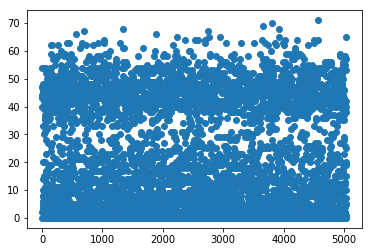

In [8]:
df = shuffle(df_tracks)
plt.scatter(range(len(df)),df['popularity'])

In [9]:
# again measuring the time
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Number of tracks where no audio features were available: 0
Time to run this code (in seconds): 14.769107902999437


In [10]:
print('number of elements in the track_id list:', len(rows))

number of elements in the track_id list: 5040


In [11]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (5040, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.99400,https://api.spotify.com/v1/audio-analysis/4Wjv...,0.305,218093,0.0272,4WjvJ6Ok5CLXokNX4YHbSS,0.771000,1,0.1150,-31.167,0,0.0420,79.243,3,https://api.spotify.com/v1/tracks/4WjvJ6Ok5CLX...,audio_features,spotify:track:4WjvJ6Ok5CLXokNX4YHbSS,0.1510
1,0.00438,https://api.spotify.com/v1/audio-analysis/2xCP...,0.434,562693,0.8840,2xCPy6z5qUIwHMHyRBRVSx,0.000676,7,0.2700,-6.342,1,0.0687,89.967,4,https://api.spotify.com/v1/tracks/2xCPy6z5qUIw...,audio_features,spotify:track:2xCPy6z5qUIwHMHyRBRVSx,0.2160
2,0.92700,https://api.spotify.com/v1/audio-analysis/1PY3...,0.614,197693,0.1970,1PY3j1faZLsURvoTXZ5rSw,0.810000,11,0.1390,-19.924,0,0.0346,81.294,4,https://api.spotify.com/v1/tracks/1PY3j1faZLsU...,audio_features,spotify:track:1PY3j1faZLsURvoTXZ5rSw,0.7590
3,0.98900,https://api.spotify.com/v1/audio-analysis/0uwQ...,0.409,339583,0.0340,0uwQ5v4To5HC2zhYTu2Qvb,0.926000,10,0.0868,-29.061,1,0.0571,81.051,4,https://api.spotify.com/v1/tracks/0uwQ5v4To5HC...,audio_features,spotify:track:0uwQ5v4To5HC2zhYTu2Qvb,0.0521
4,0.98100,https://api.spotify.com/v1/audio-analysis/2dW6...,0.504,55040,0.0816,2dW6B6Xlus66GLbHW6KCtp,0.000000,3,0.1400,-21.466,0,0.0806,74.789,1,https://api.spotify.com/v1/tracks/2dW6B6Xlus66...,audio_features,spotify:track:2dW6B6Xlus66GLbHW6KCtp,0.2300


In [12]:
df_audio_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 18 columns):
acousticness        5040 non-null float64
analysis_url        5040 non-null object
danceability        5040 non-null float64
duration_ms         5040 non-null int64
energy              5040 non-null float64
id                  5040 non-null object
instrumentalness    5040 non-null float64
key                 5040 non-null int64
liveness            5040 non-null float64
loudness            5040 non-null float64
mode                5040 non-null int64
speechiness         5040 non-null float64
tempo               5040 non-null float64
time_signature      5040 non-null int64
track_href          5040 non-null object
type                5040 non-null object
uri                 5040 non-null object
valence             5040 non-null float64
dtypes: float64(9), int64(4), object(5)
memory usage: 708.8+ KB


In [13]:
columns_to_drop = ['analysis_url','track_href','type','uri']
df_audio_features.drop(columns_to_drop, axis=1,inplace=True)

df_audio_features.rename(columns={'id': 'track_id'}, inplace=True)

df_audio_features.shape

(5040, 14)

In [14]:
# merge both dataframes
# the 'inner' method will make sure that we only keep track IDs present in both datasets
df = pd.merge(df_tracks,df_audio_features,on='track_id',how='inner')
print("Shape of the dataset:", df_audio_features.shape)
df.head()

Shape of the dataset: (5040, 14)


,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Frédéric Chopin,"Waltz No. 7 in C-Sharp Minor, Op. 64, No. 2",4WjvJ6Ok5CLXokNX4YHbSS,50,0.99400,0.305,218093,0.0272,0.771000,1,0.1150,-31.167,0,0.0420,79.243,3,0.1510
1,Rhapsody Of Fire,March Against the Tyrant,2xCPy6z5qUIwHMHyRBRVSx,48,0.00438,0.434,562693,0.8840,0.000676,7,0.2700,-6.342,1,0.0687,89.967,4,0.2160
2,Johann Sebastian Bach,"Orchestral Suite No. 4 in D Major, BWV 1069: I...",1PY3j1faZLsURvoTXZ5rSw,6,0.92700,0.614,197693,0.1970,0.810000,11,0.1390,-19.924,0,0.0346,81.294,4,0.7590
3,Frédéric Chopin,"Nocturnes, Op. 9: II. Andante in E-Flat Major",0uwQ5v4To5HC2zhYTu2Qvb,8,0.98900,0.409,339583,0.0340,0.926000,10,0.0868,-29.061,1,0.0571,81.051,4,0.0521
4,Johann Sebastian Bach,"Markus Passion, BWV 247: Recitativo (Evangelis...",2dW6B6Xlus66GLbHW6KCtp,25,0.98100,0.504,55040,0.0816,0.000000,3,0.1400,-21.466,0,0.0806,74.789,1,0.2300


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 0 to 5039
Data columns (total 17 columns):
artist_name         5040 non-null object
track_name          5040 non-null object
track_id            5040 non-null object
popularity          5040 non-null int64
acousticness        5040 non-null float64
danceability        5040 non-null float64
duration_ms         5040 non-null int64
energy              5040 non-null float64
instrumentalness    5040 non-null float64
key                 5040 non-null int64
liveness            5040 non-null float64
loudness            5040 non-null float64
mode                5040 non-null int64
speechiness         5040 non-null float64
tempo               5040 non-null float64
time_signature      5040 non-null int64
valence             5040 non-null float64
dtypes: float64(9), int64(5), object(3)
memory usage: 708.8+ KB


In [16]:
df[df.duplicated(subset=['artist_name','track_name'],keep=False)]

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence


In [17]:
df.to_csv('SpotifyAudioFeaturesclassical.csv')